<a href="https://colab.research.google.com/github/MR-Tajeddin/PYTHON/blob/main/weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing essential libraries

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from math import sqrt

# Read data from *csv* file to ```dataset``` object

In [12]:
dataset = pd.read_csv('https://raw.githubusercontent.com/QueraTeam/college-ml/main/ML_intro/6-%20machine%20learning%20in%20practice/weight_dataset.csv')

In [13]:
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Convert height from *inch* to *cm* and weight from *pound* to *kg*

In [14]:
dataset['Height']= dataset.Height.apply(lambda val : 2.54*val)

In [15]:
dataset['Weight']= dataset.Weight.apply(lambda val: 0.45359237*val)

# Let's look at data

In [16]:
dataset.head(10)

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
5,Male,170.822660,69.042272
6,Male,174.714106,83.428287
7,Male,173.605229,76.190414
8,Male,170.228132,79.800252
9,Male,161.179495,70.941700


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [18]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228114
std,9.772721,14.564143
min,137.828359,29.347484
25%,161.304276,61.606032
50%,168.447898,73.124954
75%,175.702625,84.898668
max,200.656806,122.465267


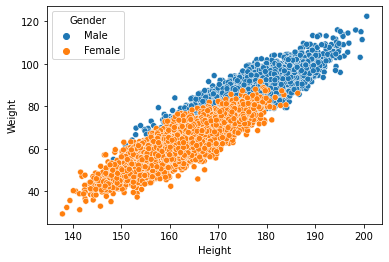

In [19]:
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=dataset)

# Let's build a predictive model!
### Before build and fit model we should replace *Female* with 0 and *Male* with 1 in `Gender` column.

In [20]:
dataset['Gender'].replace('Female',0, inplace=True)
dataset['Gender'].replace('Male',1, inplace=True)

### Choose 20% of data for test randomly!

In [21]:
x_train,x_test, y_train,y_test = train_test_split(dataset.drop('Weight',axis=1), dataset.Weight, test_size=0.2, random_state=101)

### Build and fit the `XGBRegressor`.

In [22]:
regressor = XGBRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

[17:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Predict *test* values and evaluate model performance

In [23]:
y_pred = regressor.predict(x_test)

print(f'MAE = {mean_absolute_error(y_test,y_pred)}')

MAE = 3.745334478443475


In [24]:
print(f'XG Boost Regressor is about {round(regressor.score(x_test,y_test)*100)}% accurate!')

XG Boost Regressor is about 90% accurate!
